# Clustering with any dataset (30% of mark)
1. Select any dataset that will suit for clustering
2. Observe your data
3. Apply some data preparation
4. Apply clustering model
5. Visualise your obtained clusters

### Marking scheme
1. Data Preparation - 20%
2. Kmeans model - 30%
3. Visualisation - 20%
4. Code quality - 10%
5. Results and Defence - 20%

## Introduction

The aim of this analysis is to cluster countries based on various characteristics to identify common patterns and differences among groups of countries. For this purpose, we will use data containing information on various indicators for each country.
#### Link: https://www.kaggle.com/datasets/abhishek252/cia-country-dataset-for-unsupervised-learning
#### Columns:

Country: The name of the country. <br>
Region: The region to which the country belongs.<br>
Population: The population of the country.<br>
Area (sq. mi.): The area of the country in square miles.<br>
Pop. Density (per sq. mi.): The population density of the country per square mile.<br>
Coastline (coast/area ratio): The ratio of the length of the country's coastline to its area.<br>
Net migration: The net migration rate (migrants minus emigrants) per 1000 people.<br>
Infant mortality (per 1000 births): The number of infant deaths under one year old per 1000 live births.<br>
GDP ($ per capita): The GDP per capita in dollars.<br>
Literacy (%): The percentage of the population that is literate.<br>
Phones (per 1000): The number of phones per 1000 people.<br>
Arable (%): The percentage of land area that is arable.<br>
Crops (%): The percentage of land area that is cultivated with crops.<br>
Other (%): The percentage of land area that is neither arable nor cultivated with crops.<br>
Climate: The classification of the climate on a scale from 1 to 4.<br>
Birthrate: The birth rate per 1000 people.<br>
Deathrate: The death rate per 1000 people.<br>
Agriculture: The percentage of GDP generated by agriculture.<br>
Industry: The percentage of GDP generated by industry.<br>
Service: The percentage of GDP generated by services.<br>
We will cluster countries based on their characteristics to identify common groups of similar countries with similar socio-economic and climatic conditions.<br>

# Outline
### 1. Dataset
### 2. Data preprocessing and feature ingeenirig
### 3. KMeans model
### 4. Visualisation
### 5. Conclusion

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('CIA_Country_Facts.csv') # Import dataset

In [2]:
df #To show dataset

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


In [3]:
df.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


# Data preprocessing

In [4]:
df.shape

(227, 20)

In [5]:
df.sample(5)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
102,Jamaica,LATIN AMER. & CARIB,2758124,10991,250.9,9.30,-4.92,12.36,3900.0,87.9,124.0,16.07,10.16,73.77,2.0,20.82,6.52,0.049,0.337,0.615
43,Colombia,LATIN AMER. & CARIB,43593035,1138910,38.3,0.28,-0.31,20.97,6300.0,92.5,176.2,2.42,1.67,95.91,2.0,20.48,5.58,0.125,0.342,0.533
36,Canada,NORTHERN AMERICA,33098932,9984670,3.3,2.02,5.96,4.75,29800.0,97.0,552.2,4.96,0.02,95.02,NaN,10.78,7.80,0.022,0.294,0.684
127,Maldives,ASIA (EX. NEAR EAST),359008,300,1196.7,214.67,0.00,56.52,3900.0,97.2,90.0,13.33,16.67,70.00,2.0,34.81,7.06,0.200,0.180,0.620
25,Bosnia & Herzegovina,EASTERN EUROPE,4498976,51129,88.0,0.04,0.31,21.05,6100.0,NaN,215.4,13.60,2.96,83.44,4.0,8.77,8.27,0.142,0.308,0.550


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [7]:
df.nunique()

Country                               227
Region                                 11
Population                            227
Area (sq. mi.)                        226
Pop. Density (per sq. mi.)            219
Coastline (coast/area ratio)          151
Net migration                         157
Infant mortality (per 1000 births)    220
GDP ($ per capita)                    130
Literacy (%)                          140
Phones (per 1000)                     214
Arable (%)                            203
Crops (%)                             162
Other (%)                             209
Climate                                 6
Birthrate                             220
Deathrate                             201
Agriculture                           150
Industry                              155
Service                               167
dtype: int64

In [8]:
df[df['Agriculture'].isnull()] = df[df['Agriculture'].isnull()].fillna(value=0) # This code fills the missing values in the agriculture column with 0's for all rows that have no agriculture values

df['Climate'] = df['Climate'].fillna(
    df.groupby('Region')['Climate'].transform('mean')) # This code fills the missing values in the climate column with the average climate value for each region

df['Literacy (%)'] = df['Literacy (%)'].fillna(
    df.groupby('Region')['Literacy (%)'].transform('mean')) # This code fills the missing values in the literacy column with the average literacy value for each region

In [9]:
df.dropna(inplace=True) # This code removes rows with missing values after filling in the missing values in agriculture, climate and literacy

In [10]:
df[df.isnull().any(axis=1)]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service


In [11]:
print(df.duplicated().sum())

0


In [12]:
df.sample(5)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
179,Saudi Arabia,NEAR EAST,27019731,1960582,13.8,0.13,-2.71,13.24,11800.0,78.8,140.6,1.67,0.09,98.24,1.00,29.34,2.58,0.033,0.613,0.354
11,Australia,OCEANIA,20264082,7686850,2.6,0.34,3.98,4.69,29000.0,100.0,565.5,6.55,0.04,93.41,1.00,12.14,7.51,0.038,0.262,0.700
137,Moldova,C.W. OF IND. STATES,4466706,33843,132.0,0.00,-0.26,40.42,1800.0,99.1,208.1,55.30,10.79,33.91,2.55,15.70,12.64,0.213,0.233,0.555
204,Trinidad & Tobago,LATIN AMER. & CARIB,1065842,5128,207.9,7.06,-10.83,24.31,9500.0,98.6,303.5,14.62,9.16,76.22,2.00,12.90,10.57,0.007,0.570,0.423
213,United Kingdom,WESTERN EUROPE,60609153,244820,247.6,5.08,2.19,5.16,27700.0,99.0,543.5,23.46,0.21,76.33,3.00,10.71,10.13,0.005,0.237,0.758


(0.0, 500000000.0)

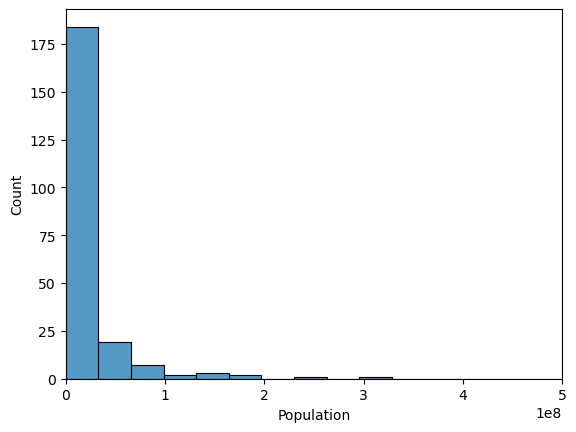

In [13]:
sns.histplot(data=df, x='Population', bins=40)
plt.xlim((0, 0.5*10**9)) # the code  set the x axis limits from 0 to 500 million, since there are countries such as China and India whose population exceeds 1 billion people, which can interfere with our clustering

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'ASIA (EX. NEAR EAST)         '),
  Text(1, 0, 'EASTERN EUROPE                     '),
  Text(2, 0, 'NORTHERN AFRICA                    '),
  Text(3, 0, 'OCEANIA                            '),
  Text(4, 0, 'WESTERN EUROPE                     '),
  Text(5, 0, 'SUB-SAHARAN AFRICA                 '),
  Text(6, 0, 'LATIN AMER. & CARIB    '),
  Text(7, 0, 'C.W. OF IND. STATES '),
  Text(8, 0, 'NEAR EAST                          '),
  Text(9, 0, 'NORTHERN AMERICA                   '),
  Text(10, 0, 'BALTICS                            ')])

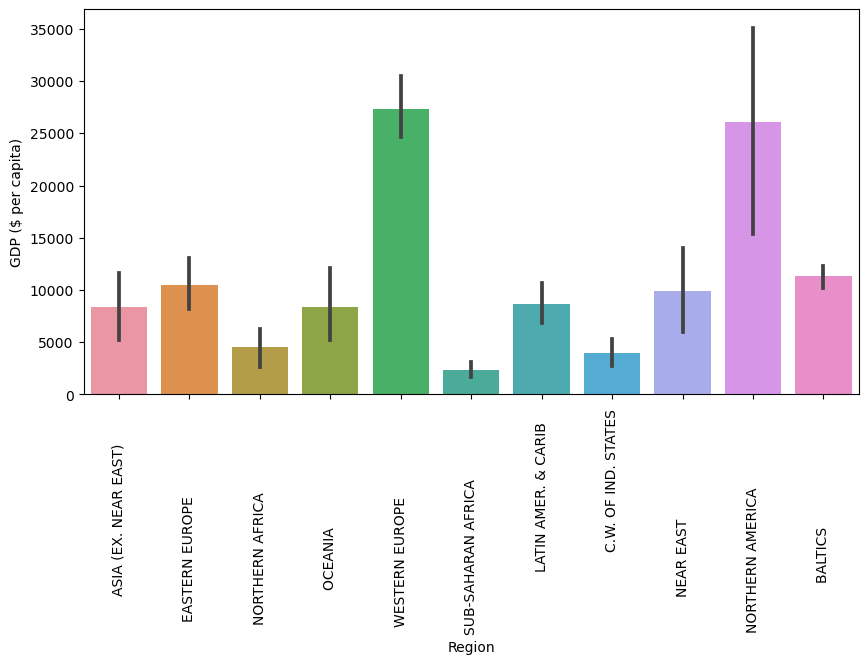

In [14]:
plt.figure(figsize=(10, 5)) # set the size of the figure
sns.barplot(data=df, x='Region', y='GDP ($ per capita)') # creates a bar chart
plt.xticks(rotation=90) # rotates x-axis labels by 90 degrees

# KMeans model

In [15]:
X = df[['Literacy (%)', 'Arable (%)', 'Crops (%)', 'Agriculture', 'Industry', 'Service']].values # this code creates an array X, these columns are used for clustering

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

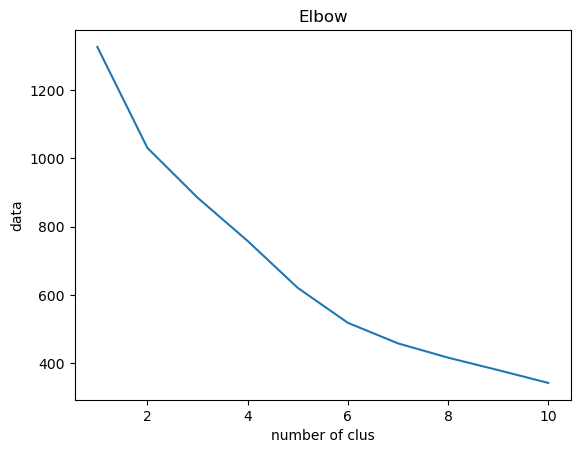

In [17]:
data = []
for i in range(1,11): # looping from 1 to 10 creates a KMeans object with the current number of clusters
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
    kmeans.fit(X_scaled) # KMeans model is trained on data X
    data.append(kmeans.inertia_)
plt.plot(range(1,11), data)
plt.title('Elbow')
plt.xlabel('number of clus')
plt.ylabel('data')
plt.show() # after the cycle is completed, the graph shows the dependence of the sum of squared distances on the number of clusters.
# On this chart you can find the elbow method

#### We run the KMeans algorithm with the selected number of clusters (n_clusters=3). KMeans randomly comes up with cluster centroids and then iteratively moves them, minimizing the distances of the sum squares from the points to the nearest centroid.

In [18]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state=42) # KMeans object is created with n_clusters = 5 to indicate the number of clusters
y_kmeans = kmeans.fit_predict(X) # performs clustering and returns an array of cluster labels
df['Cluster'] = kmeans.fit_predict(X) # fit_predict method is also applied to X to assign cluster labels to each row in X and the results are stored in a new cluster column in df

# Visualisation


#### Each country is assigned a cluster number to which it belongs. This allows you to visualize and analyze groups of countries with similar characteristics.

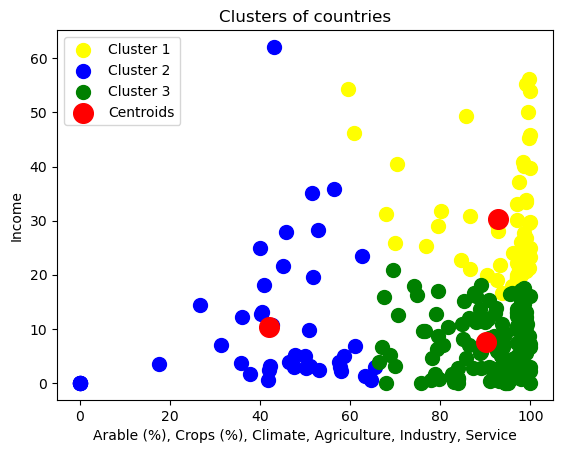

In [19]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
 # this code creates a scatter plot
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'red', label = 'Centroids') #t his code draws points for cluster centroids, to understand where is center of cluster
plt.title('Clusters of countries')
plt.xlabel('Arable (%), Crops (%), Climate, Agriculture, Industry, Service')
plt.ylabel('Income')
plt.legend() # creates a label for the legend indicating cluster number
plt.show() # showing scatter plot

In [20]:
clusters = pd.DataFrame(df['Country'])
clusters['Cluster'] = df['Cluster']

for i in range(3):
    print(f"Cluster {i+1}:")
    print(clusters[clusters['Cluster'] == i]['Country'].tolist())
    print()
# displays names of countries for each cluster from 1 to 5

Cluster 1:
['Albania', 'Azerbaijan', 'Barbados', 'Belarus', 'Belgium', 'Bermuda', 'British Virgin Is.', 'Bulgaria', 'Croatia', 'Cuba', 'Czech Republic', 'Denmark', 'Dominican Republic', 'El Salvador', 'France', 'Gaza Strip', 'Germany', 'Greece', 'Hungary', 'India', 'Italy', 'Korea, North', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macedonia', 'Malta', 'Marshall Islands', 'Mauritius', 'Moldova', 'Montserrat', 'Netherlands', 'Nigeria', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Rwanda', 'Saint Kitts & Nevis', 'Saint Vincent and the Grenadines', 'Samoa', 'Slovakia', 'Spain', 'Syria', 'Taiwan', 'Thailand', 'Togo', 'Tonga', 'Turkey', 'Uganda', 'Ukraine', 'United Kingdom', 'United States', 'Vietnam']

Cluster 2:
['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Bhutan', 'Burkina Faso', 'Burundi', 'Central African Rep.', 'Chad', 'Comoros', 'Congo, Dem. Rep.', "Cote d'Ivoire", 'Egypt', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia, The', 'Gibraltar', 'Greenland', 'Guinea', 'Guinea

In [21]:
df['Clusters_index'] = y_kmeans
y_kmeans # displaying cluster labels

array([1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 0, 0, 0, 2, 1,
       0, 1, 2, 2, 2, 2, 0, 2, 0, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 2, 1, 2, 1, 2, 2, 2,
       0, 2, 2, 1, 1, 0, 2, 0, 2, 1, 0, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2,
       0, 2, 0, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 1, 2, 0, 0, 0, 2, 0, 2, 1, 2, 2, 1, 0, 0, 2, 1, 0, 1, 2,
       2, 0, 2, 0, 1, 1, 2, 1, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 1,
       1, 1, 2, 0, 2, 2, 1, 2, 0, 2, 1, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0,
       2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 1, 2, 0, 2, 1, 2, 1, 1, 2,
       2])

In [22]:
df

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Cluster,Clusters_index
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.000000,...,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,1,1
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.500000,...,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,0,0
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.000000,...,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298,2,2
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.000000,...,15.00,75.00,2.0,22.46,3.27,0.000,0.000,0.000,2,2
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.000000,...,0.00,97.78,3.0,8.71,6.25,0.000,0.000,0.000,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,79.521429,...,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630,2,2
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,0.00,0.00,0.0,0.000000,...,0.00,99.98,1.0,0.00,0.00,0.000,0.000,0.400,1,1
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.200000,...,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393,1,1
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.600000,...,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489,2,2


In [23]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

X = df[['Arable (%)', 'Crops (%)', 'Climate', 'Agriculture', 'Industry', 'Service']].values
y = df['GDP ($ per capita)'].values

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_

indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]})")
# A little off topic, this code uses random forest to estimate the importance of features in a dataset, how much it contributes to the GDP ($ per capita)

Feature ranking:
1. feature 3 (0.5883281014178183)
2. feature 5 (0.11734734506541633)
3. feature 2 (0.09640954289753123)
4. feature 1 (0.07991222928481416)
5. feature 0 (0.0767976307280831)
6. feature 4 (0.04120515060633685)


# Conclusion
In this evaluation, we used the K-way clustering method to classify nations based totally on their agricultural, climatic, and financial characteristics. The uncooked data become organized through filling within the gaps with local averages and replacing the gaps with zeros within the numeric columns. By visualizing the populace histogram and analyzing the distribution of GDP in line with capita with the aid of area, we got an preliminary idea of the structure of the records. We then used the elbow technique to decide the gold standard number of clusters, which turned into determined to be five. As a end result of clustering, each united states of america was assigned to one of five clusters. Visualization of clusters on a plane showed that nations have been divided into groups based on comparable financial and agricultural characteristics. The cluster centroids marked within the graph display the common characteristics for each organization of nations.

#### <Strong>Cluster 1</Strong>:
Countries in this cluster are mainly European nations along with some higher-income non-European regions. Many of these countries have advanced economies and high standards of living.

#### <Strong>Cluster 2</Strong>:
This cluster includes countries with lower-income economies, many of which are in Africa and Asia. These countries may face significant development challenges and have lower GDP per capita.

#### <Strong>Cluster 3</Strong>:
Cluster 3 comprises a mix of countries from different continents, including both emerging economies and smaller nations. This cluster seems to be more diverse, including middle-income countries and some high-income territories.
